In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes  
diabetes = load_diabetes()  
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['TARGET'] = diabetes.target 


In [2]:
print(df.head())

print(df.isnull().sum())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  TARGET  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
TARGET    0
dtype: int64


In [3]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [4]:
df.fillna(df.median(), inplace=True)

In [5]:
threshold = 0.05
filtered_df = df[df['bmi'] > threshold]
print(filtered_df.head())

         age       sex       bmi        bp        s1        s2        s3  \
0   0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
8   0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
23  0.045341  0.050680  0.060618  0.031065  0.028702 -0.047347 -0.054446   
27 -0.023677 -0.044642  0.059541 -0.040099 -0.042848 -0.043589  0.011824   
32  0.034443  0.050680  0.125287  0.028758 -0.053855 -0.012900 -0.102307   

          s4        s5        s6  TARGET  
0  -0.002592  0.019907 -0.017646   151.0  
8  -0.002592 -0.014960  0.011349   110.0  
23  0.071210  0.133597  0.135612   245.0  
27 -0.039493 -0.015999  0.040343    85.0  
32  0.108111  0.000272  0.027917   341.0  


In [6]:
df['Target_Category'] = np.where(df['TARGET'] > 150, 'High Target', 'Low Target')

grouped_stats = df.groupby('Target_Category').agg(['mean', 'std'])
print(grouped_stats)

                      age                 sex                 bmi            \
                     mean       std      mean       std      mean       std   
Target_Category                                                               
High Target      0.008126  0.046121  0.001113  0.047742  0.023590  0.047116   
Low Target      -0.006715  0.047884 -0.000920  0.047596 -0.019496  0.038378   

                       bp                  s1            ...        s3  \
                     mean       std      mean       std  ...      mean   
Target_Category                                          ...             
High Target      0.020134  0.047723  0.009363  0.048093  ... -0.016967   
Low Target      -0.016639  0.040674 -0.007738  0.045898  ...  0.014022   

                                 s4                  s5                  s6  \
                      std      mean       std      mean       std      mean   
Target_Category                                                            

In [7]:
df_additional = df[['TARGET']].copy()
df_additional['Additional_Info'] = np.random.rand(len(df))

merged_df = pd.merge(df, df_additional, on='TARGET')
print(merged_df.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
2  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
3 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
4 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   

         s4        s5        s6  TARGET Target_Category  Additional_Info  
0 -0.002592  0.019907 -0.017646   151.0     High Target         0.413436  
1 -0.002592  0.019907 -0.017646   151.0     High Target         0.027720  
2 -0.002592  0.019907 -0.017646   151.0     High Target         0.808061  
3 -0.039493 -0.068332 -0.092204    75.0      Low Target         0.330627  
4 -0.039493 -0.068332 -0.092204    75.0      Low Target         0.597473  


In [8]:
df['bmi_per_age'] = df['bmi'] / df['age']
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  TARGET Target_Category  bmi_per_age  
0 -0.002592  0.019907 -0.017646   151.0     High Target     1.620348  
1 -0.039493 -0.068332 -0.092204    75.0      Low Target    27.350483  
2 -0.002592  0.002861 -0.025930   141.0      Low Target     0.521123  
3  0.034309  0.022688 -0.009362   206.0     High Target     0.130189  
4 -0.002592 -0.031988 -0.046641   135.0      Low Target    -6.759109  


In [9]:
df.drop(['bmi_per_age'],inplace=True,axis=1)

In [10]:
correlation_matrix = df.select_dtypes(include='number').corr()


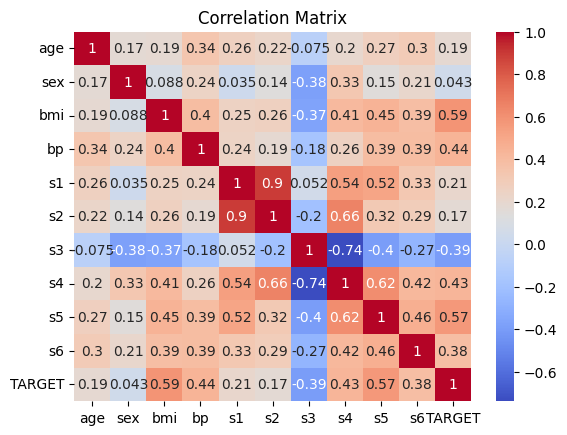

In [11]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

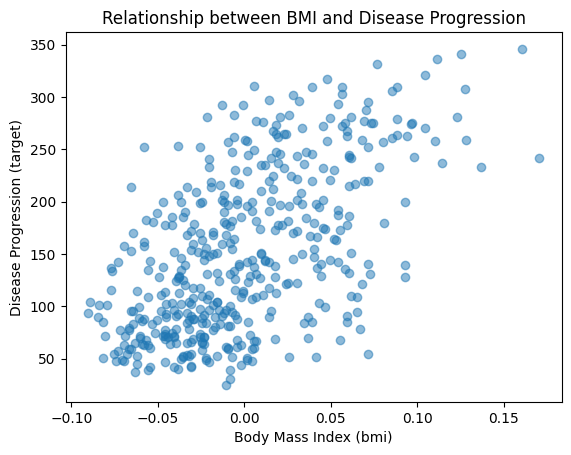

In [12]:
plt.scatter(df['bmi'], df['TARGET'], alpha=0.5)
plt.xlabel('Body Mass Index (bmi)')
plt.ylabel('Disease Progression (target)')
plt.title('Relationship between BMI and Disease Progression')
plt.show()